In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)

## This notebook analyses results of experiment 2 (Extensive BME)

#### Load data

In [2]:
pd.options.display.max_columns = 99
pd.options.display.max_rows = 99

In [3]:
# bs_base + fe + n - bs_totl == 0 . OK

# I want sum of cross covariance terms for components of the same m

# there are 6 varieties of combination (b, fe), (fe, n), (n, b), bb nn fefe, on diagonal (i = j) and off diagonal.

# Not sure what is a practical way to slice data and cov matrices...
# But anyway everything I want is just here.

In [4]:
for name in ['cov_elements_desc_sorted_lin', 'parts_cross_cov_sorted_lin', 'cov_elements_desc_sorted_log', 
           'parts_cross_cov_sorted_log', 'cov_elements_desc_random_lin', 'parts_cross_cov_random_lin',
            'cov_elements_desc_random_log', 'parts_cross_cov_random_log']:
    globals()[name] = pd.read_csv('./../../data/bootstraps/'+name+'.csv')


In [17]:
Q = 10

## See Residuals
(Difference of cov elements from mean)

In [6]:
# here just merge observed elements to mean values.
# then, columns can be subtracted.

# Mean of means. Can do it because for all m there are equal number of elements in each group.

df_desc = cov_elements_desc_sorted_lin
df_obs = parts_cross_cov_sorted_lin

mean_values = df_desc.groupby(['s', 'diag', 'compA', 'compB'])['mean'].mean().reset_index()

# the sigma i should be the sqrt of the diagonal terms.
obs_mean = df_obs.merge(mean_values[['s', 'compA', 'compB', 'diag', 'mean']]) #(?)

sigmas = obs_mean.loc[(obs_mean.compA == obs_mean.compB) & (obs_mean.partA == obs_mean.partB)]
sigmas['std'] = np.sqrt(sigmas['cov'])
sigmas = sigmas.groupby(['s', 'compA','compB', 'diag'])['std'].mean().reset_index()


# len(df_desc)/9/2/100/5 == 1 # 9 blocks, diag-off diag, Q2, s

df_obs['diag'] = (df_obs.partA == df_obs.partB).map({True: 'diag', False: 'offdiag'})

df_obs.head()

obs_mean = df_obs.merge(mean_values[['s', 'compA', 'compB', 'diag', 'mean']])
obs_mean['diff'] = obs_mean['cov'] - obs_mean['mean']

obs_mean_sigmas = obs_mean.merge(sigmas[['s', 'compA', 'std']], on = ['s', 'compA']).merge(sigmas[['s', 'compB', 'std']], on = ['s', 'compB'])
obs_mean_sigmas = obs_mean_sigmas.rename(columns = {'std_x': 'std_A', 'std_y': 'std_B'})

obs_mean_sigmas['cov_ee'] = obs_mean_sigmas['diff']/ (obs_mean_sigmas['std_A'] * obs_mean_sigmas['std_B'])

# sq_devs = obs_mean_sigmas.loc[obs_mean_sigmas.s == 0.5].groupby(['compA','partA','compB','partB']).apply(lambda x: ((x['diff']/ x['std_A']/ x['std_B'])**2).mean())
# plt.imshow(sq_devs.unstack([0, 1]).values)
# sq_devs.unstack([0, 1]).round(1)

# df

/home/miglesia/anaconda2/envs/my_pymc_env/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


/home/miglesia/anaconda2/envs/my_pymc_env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/miglesia/anaconda2/envs/my_pymc_env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/miglesia/anaconda2/envs/my_pymc_env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/miglesia/anaconda2/envs/my_pymc_env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in 

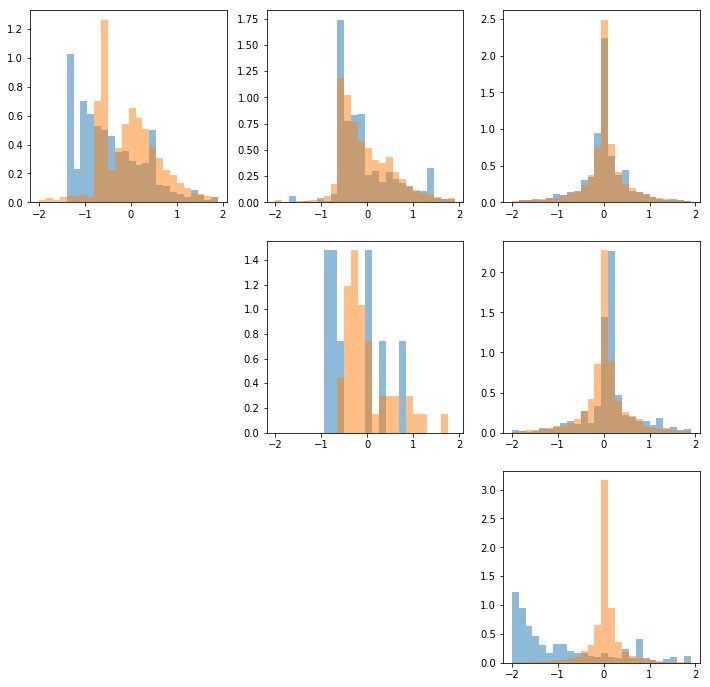

In [7]:
# plt.matshow(np.log10(sq_devs.unstack([0, 1]).values))
fig, axs = plt.subplots(3,3, figsize = (12, 12))
    
for i, compA in enumerate(['base', 'FE', 'noise']):
    for j, compB in enumerate(['base', 'FE', 'noise']):
        ax = axs[i][j]
        if i <= j:
            df = obs_mean_sigmas
            df = df.loc[df.s == 0.5]
            df = df.loc[(df.compA == compA) & (df.compB == compB)]

            for d in ['diag', 'offdiag']:
#                 print(len(df.loc[df.diag == d].cov_ee))
                ax.hist(df.loc[df.diag == d].cov_ee, np.arange(-2, 2, .15), normed = True, alpha = .5)
#                 ax.set_yscale('log')

        else:
            ax.set_axis_off()
                
plt.show()

## See mean values of Cov matrix

In [8]:
# Older plots. Legacy.

# result = cov_elements_desc_random_lin
# plot_data = result.reset_index().groupby(['compA', 'compB', 'diag', 's']).mean().drop('m', axis = 1).reset_index()

# fig, axs = plt.subplots(3,3, figsize = (12, 12))
# # plot_data = result.reset_index().groupby(['compA', 'compB', 'diag', 's']).mean().drop('m', axis = 1).reset_index()
# plot_data['i'] = plot_data.compA.map({'FE': 1, 'base': 0, 'noise': 2})
# plot_data['j'] = plot_data.compB.map({'FE': 1, 'base': 0, 'noise': 2})

# # box titles 
# titles = np.array([[r'$cov(B_{it}, B_{jt})$', r'$cov(B_{it}, M_{jt})$', r'$cov(B_{it}, E_{jt})$'], ['', r'$cov(M_{it}, M_{jt})$', r'$cov(M_{it}, E_{jt})$'], ['','' , r'$cov(E_{it}, E_{jt})$']])

# for i in range(3):
#     for j in range(3):
#         ax = axs[i][j]
#         if i <= j:
#             ax.set_title(titles[i][j])
#             slice_data = plot_data.loc[(plot_data.i == i) & (plot_data.j == j)].reset_index(drop = True)

#             diag_data = slice_data.loc[slice_data.diag == 'diag']
#             p1 = ax.bar(diag_data.index, diag_data['mean'], yerr = diag_data['std'])

#             offdiag_data = slice_data.loc[slice_data.diag == 'offdiag']
#             p2 = ax.bar(offdiag_data.index + 1, offdiag_data['mean'], yerr = offdiag_data['std'])

#             ax.set_ylim(-3e18, 1e19)
            
#             labels = []
#             ax.set_xticks(list(diag_data.index) + list(offdiag_data.index + 1))
#             ax.set_xticklabels(slice_data.s.values, rotation=45, ha = 'right')
            
#             ax.legend((p1[0], p2[0]), (r'$i = j$', r'$i \neq j$'))
            
#             ax.axvline(5, c = '.5', lw = 1)
            
#             ax.set_xlabel('std of firm sales '+r'$(\sigma)$')

#         else:
#             ax.set_axis_off()
            
# plt.tight_layout()
# # plt.savefig('./../../../WRITING/paper1_writing/figures/components_crosscov.png')
# plt.show()

In [9]:
# Blue, yellow colors.
# '#1f77b4',
#  '#ff7f0e',

Random Parts. Linear var


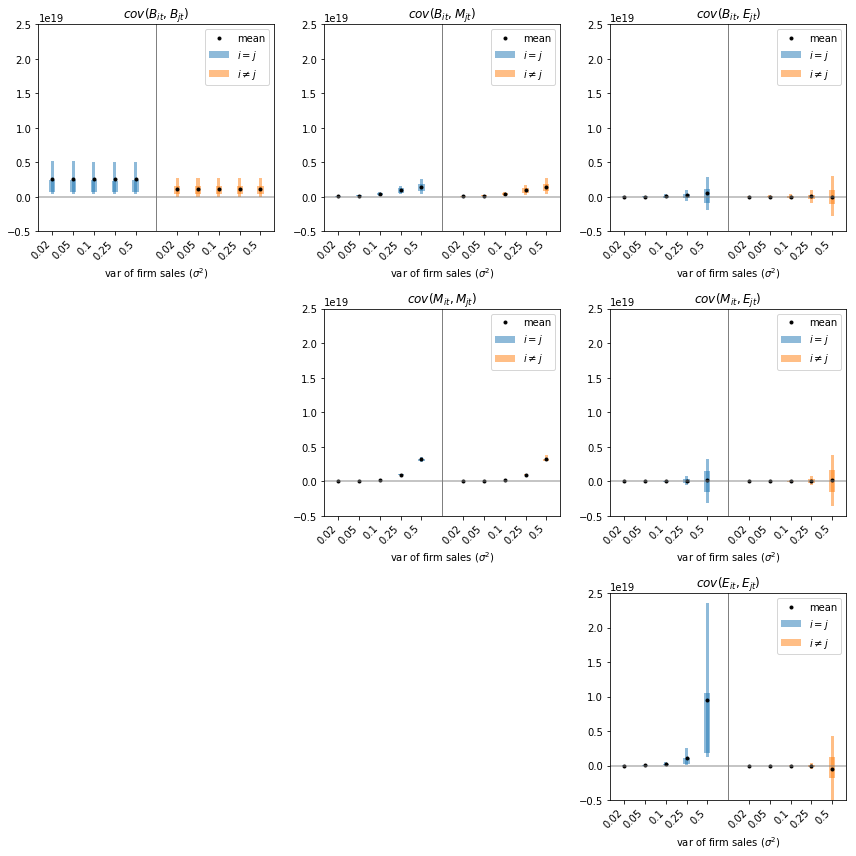

Quantile Parts. Linear var


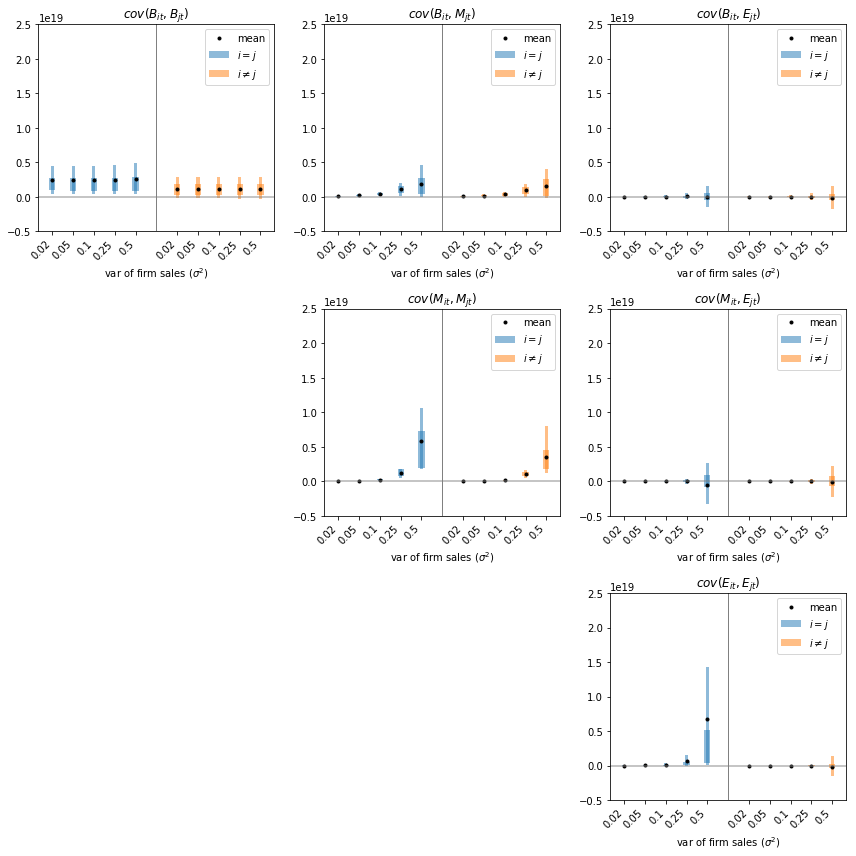

Random Parts. Log var


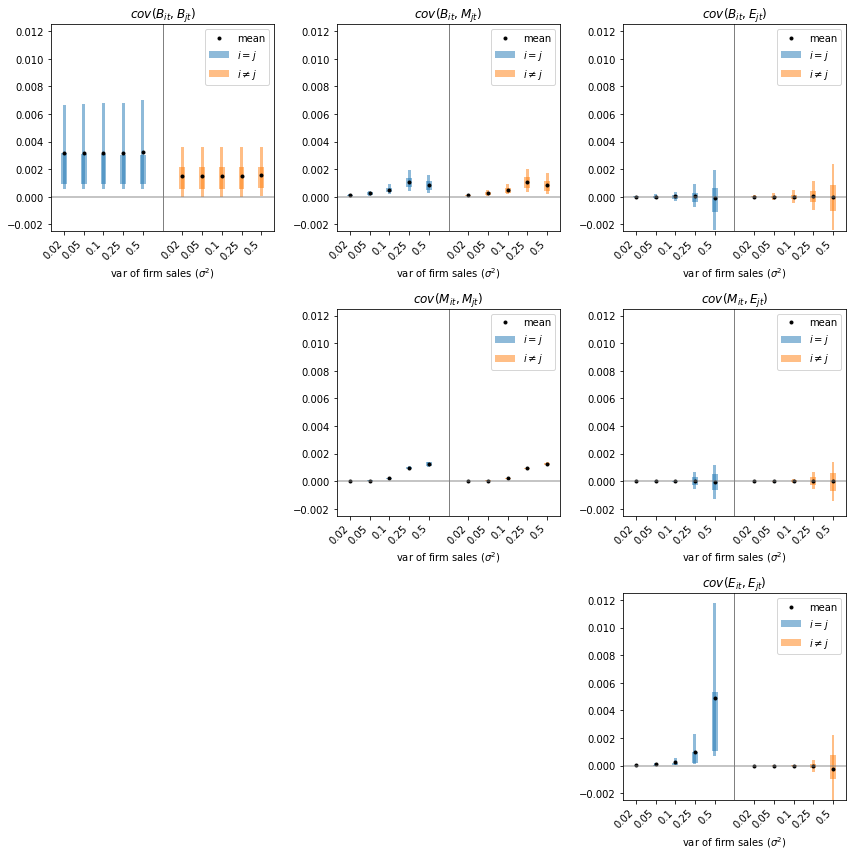

Quantile Parts. Log var


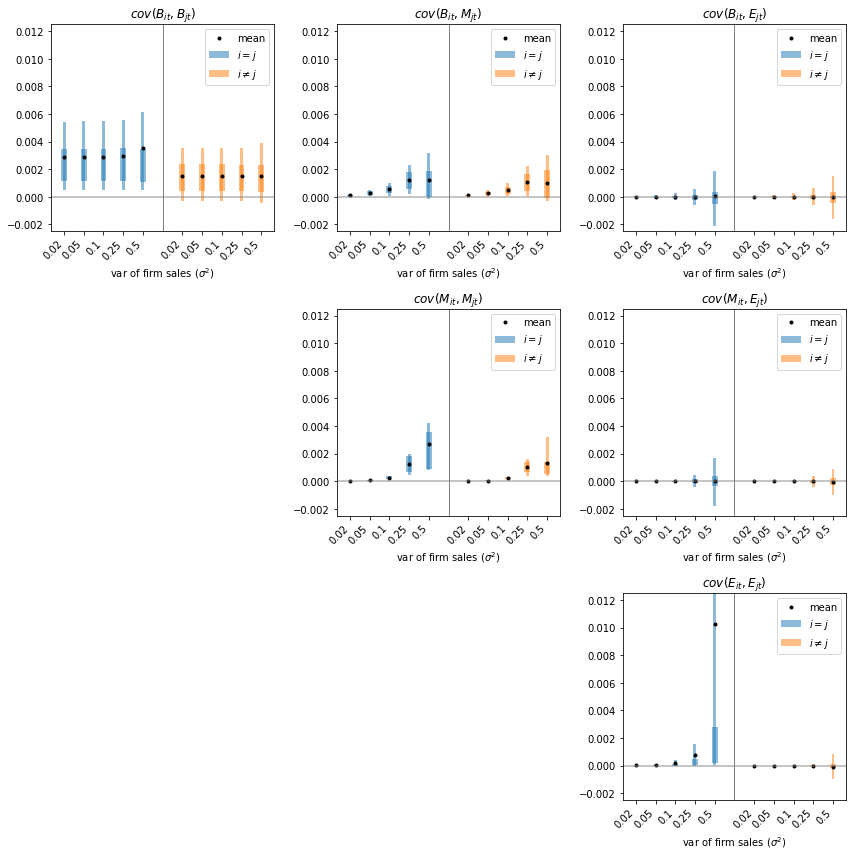

In [10]:

for k, result in enumerate([cov_elements_desc_random_lin, cov_elements_desc_sorted_lin,
                           cov_elements_desc_random_log, cov_elements_desc_sorted_log]):
    print(['Random Parts. Linear var', 'Quantile Parts. Linear var',
          'Random Parts. Log var', 'Quantile Parts. Log var'][k])
    
    plot_data = result.reset_index().groupby(['compA', 'compB', 'diag', 's']).mean().drop('m', axis = 1).reset_index()

    fig, axs = plt.subplots(3,3, figsize = (12, 12))
    # plot_data = result.reset_index().groupby(['compA', 'compB', 'diag', 's']).mean().drop('m', axis = 1).reset_index()
    plot_data['i'] = plot_data.compA.map({'FE': 1, 'base': 0, 'noise': 2})
    plot_data['j'] = plot_data.compB.map({'FE': 1, 'base': 0, 'noise': 2})

    # box titles 
    titles = np.array([[r'$cov(B_{it}, B_{jt})$', r'$cov(B_{it}, M_{jt})$', r'$cov(B_{it}, E_{jt})$'], ['', r'$cov(M_{it}, M_{jt})$', r'$cov(M_{it}, E_{jt})$'], ['','' , r'$cov(E_{it}, E_{jt})$']])

    for i in range(3):
        for j in range(3):
            ax = axs[i][j]
            if i <= j:
                ax.set_title(titles[i][j])
                slice_data = plot_data.loc[(plot_data.i == i) & (plot_data.j == j)].reset_index(drop = True)

                diag_data = slice_data.loc[slice_data.diag == 'diag']
    #             p1 = ax.bar(diag_data.index, diag_data['mean'], yerr = diag_data['std'])

                x = diag_data.index; y = diag_data['mean'];
                p11 = ax.plot(x, y, marker = '.', lw = 0, c = 'k')
                p12 = ax.bar(x, bottom = diag_data['pct25'], height = diag_data['pct75'] - diag_data['pct25'], width = .3, alpha = .5, color = '#1f77b4')
                p13 = ax.bar(x, bottom = diag_data['pct10'], height = diag_data['pct90'] - diag_data['pct10'], width = .15, alpha = .5, color = '#1f77b4')

                offdiag_data = slice_data.loc[slice_data.diag == 'offdiag']
    #             p2 = ax.bar(offdiag_data.index + 1, offdiag_data['mean'], yerr = offdiag_data['std'])
                x = offdiag_data.index + 1; y = offdiag_data['mean'];
                p21 = ax.plot(x, y, marker = '.', lw = 0, c = 'k')
                p22 = ax.bar(x, bottom = offdiag_data['pct25'], height = offdiag_data['pct75'] - offdiag_data['pct25'], width = .3, alpha = .5, color = '#ff7f0e')
                p33 = ax.bar(x, bottom = offdiag_data['pct10'], height = offdiag_data['pct90'] - offdiag_data['pct10'], width = .15, alpha = .5, color = '#ff7f0e')

                if k >= 2: # Log variances
                    ax.set_ylim(-0.0025, 0.0125)
                else: # Linear variances
                    ax.set_ylim(-.5e19, 2.5e19)

                ax.axhline(0, c = '.5', alpha = .6)

                labels = []
                ax.set_xticks(list(diag_data.index) + list(offdiag_data.index + 1))
                ax.set_xticklabels(slice_data.s.values, rotation=45, ha = 'right')

                ax.legend((p11[0], p12[0], p22[0]), ('mean', r'$i = j$', r'$i \neq j$'))#, , r'$i \neq j$'))

                ax.axvline(5, c = '.5', lw = 1)

                ax.set_xlabel('var of firm sales '+r'$(\sigma^2)$')

            else:
                ax.set_axis_off()

    plt.tight_layout()
    filetag = ['P_lin', 'Q_lin', 'P_log', 'Q_log'][k]
    plt.savefig('./../../../WRITING/paper1_writing/figures/components_crosscov_'+filetag+'.png')
    plt.show()

## Cross covariances of parts

In [11]:
# # parts_cross_cov_random_log.groupby(['s', 'partA', 'partB']).agg(['mean', 'median', 'std'])

# m_pick = np.random.choice(range(n))

# cov_vals = parts_cross_cov_random_log

# cov_vals = cov_vals.loc[(cov_vals.m == m_pick) & (cov_vals.s == .5)]

# cov_vals = cov_vals.set_index(['partA', 'partB'])[['cov']].unstack()

# pd.DataFrame(np.flip(cov_vals.values))

In [12]:
for name in ['cov_elements_desc_sorted_lin', 'parts_cross_cov_sorted_lin', 'cov_elements_desc_sorted_log', 
           'parts_cross_cov_sorted_log', 'cov_elements_desc_random_lin', 'parts_cross_cov_random_lin',
            'cov_elements_desc_random_log', 'parts_cross_cov_random_log']:
    globals()[name] = pd.read_csv('./../../data/bootstraps/'+name+'.csv')

    

In [13]:
# parts_cross_cov_random_log['partA'] = Q - parts_cross_cov_random_log['partA']
# parts_cross_cov_random_log['partB'] = Q - parts_cross_cov_random_log['partB']

# parts_cross_cov_sorted_log['partA'] = Q - parts_cross_cov_sorted_log['partA']
# parts_cross_cov_sorted_log['partB'] = Q - parts_cross_cov_sorted_log['partB']

# parts_cross_cov_random_lin['partA'] = Q - parts_cross_cov_random_lin['partA']
# parts_cross_cov_random_lin['partB'] = Q - parts_cross_cov_random_lin['partB']

# parts_cross_cov_sorted_lin['partA'] = Q - parts_cross_cov_sorted_lin['partA']
# parts_cross_cov_sorted_lin['partB'] = Q - parts_cross_cov_sorted_lin['partB']

In [14]:
# df.loc[0.5]['cov']['median'].unstack([-2, -1])

sum:8.332596966502881e+20
trace:1.5322540678815554e+20
sum:8.332596966502884e+20
trace:1.5096422084116932e+20


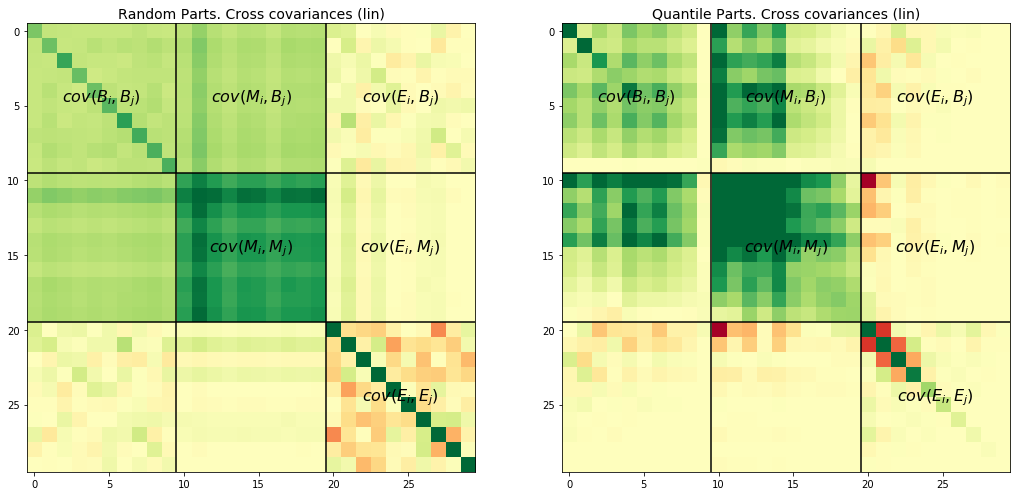

sum:0.4870121997286464
trace:0.09419045286444075
sum:0.6157631110343286
trace:0.16463414759392883


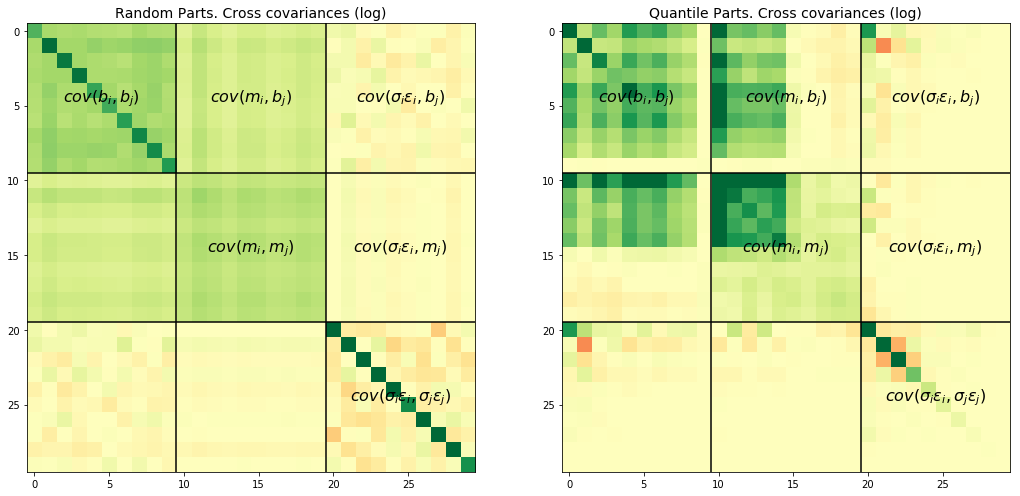

In [18]:

for scale in ['lin', 'log']:

    if scale == 'log':
        rand = parts_cross_cov_random_log.groupby(['s', 'compA', 'partA', 'compB', 'partB']).agg(['mean', 'median', 'std'])
        sort = parts_cross_cov_sorted_log.groupby(['s', 'compA', 'partA', 'compB', 'partB']).agg(['mean', 'median', 'std'])
    else:
        rand = parts_cross_cov_random_lin.groupby(['s', 'compA', 'partA', 'compB', 'partB']).agg(['mean', 'median', 'std'])
        sort = parts_cross_cov_sorted_lin.groupby(['s', 'compA', 'partA', 'compB', 'partB']).agg(['mean', 'median', 'std'])


    fig, axs = plt.subplots(1, 2, figsize = (15, 7))

    for i, df in enumerate([rand, sort]):
        ax = axs[i]
        mat_data = df.loc[0.5]['cov']['mean'].unstack([-2, -1])
        mat_data = mat_data.reindex(['noise', 'FE', 'base'], level = 0).reindex(['noise', 'FE', 'base'], level = 0, axis = 1) # Custom shuffle of components
        mat_data = np.flip(mat_data.values);# Flip for desired order of quantiles
        
        print('sum:'+str(mat_data.sum())); print('trace:'+str(np.diagonal(mat_data).sum()));
               
        std_data = df.loc[0.5]['cov']['std'].unstack([-2, -1])
        std_data = std_data.reindex(['noise', 'FE', 'base'], level = 0).reindex(['noise', 'FE', 'base'], level = 0, axis = 1) # Custom shuffle of components
        std_data = np.flip(std_data.values);# Flip for desired order of quantiles
        
        avg_magnitude = np.log10(abs(mat_data).mean()).round(); #c = int(-avg_magnitude)

        if scale == 'log': 
            c = 3
        else:
            c = -18
        
        mat_data_sc = mat_data*10**(c)
        std_data_sc = std_data*10**(c)

#         display(mat_data_sc)
        im = ax.imshow(mat_data_sc, vmin = -4, vmax = 4, cmap = 'RdYlGn')

#         # Show all ticks...
#         ax.set_xticks(range(Q))
#         ax.set_yticks(range(Q))
#         # ... and label them with the respective list entries
#         ax.set_xticklabels(range(1, Q + 1))
#         ax.set_yticklabels(range(1, Q + 1))

        # Anotate cov labels  
        if scale == 'lin':
            for c1, x in enumerate(range(3)):
                for c2, y in enumerate(range(3)):
                    x = [4.5, 14.5, 24.5][c1]
                    y = [4.5, 14.5, 24.5][c2]
                    if x>=y:
                        text = ax.text(x, y, r'$ cov('+['B_i', 'M_i', 'E_i'][c1]+', '+['B_j', 'M_j', 'E_j'][c2]+')$',
                                           ha="center", va="center", color="k", fontsize = 16)
                    
        if scale == 'log':
            for c1, x in enumerate(range(3)):
                for c2, y in enumerate(range(3)):
                    x = [4.5, 14.5, 24.5][c1]
                    y = [4.5, 14.5, 24.5][c2]
                    if x>=y:
                        text = ax.text(x, y, r'$ cov('+['b_i', 'm_i', '\sigma_i \epsilon_i'][c1]+', '+['b_j', 'm_j', '\sigma_j \epsilon_j'][c2]+')$',
                                           ha="center", va="center", color="k", fontsize = 16)
            
                

        ax.set_title(['Random Parts. ', 'Quantile Parts. '][i] + "Cross covariances ("+ scale + ')', fontsize = 14)
        
        # Block lines
        ax.axhline(2*Q - .5, c = 'k')
        ax.axvline(2*Q - .5, c = 'k')
        ax.axhline(Q - .5, c = 'k')
        ax.axvline(Q - .5, c = 'k')

    
    fig.tight_layout()

#     plt.savefig('./../../../WRITING/paper1_writing/figures/parts_crosscov_'+scale+'.png')
    plt.savefig('./../../../WRITING/paper1_writing/figures/full_crosscov_'+scale+'.png')

    plt.show()

In [19]:
r'$ cov('+['B_i', 'M_i', 'E_i'][c1]+', '+['B_j', 'M_j', 'E_j'][c2]+')$'

'$ cov(E_i, E_j)$'

In [31]:
parts_cross_cov_random_log.loc[(parts_cross_cov_random_log.compA == 'noise') & (parts_cross_cov_random_log.compB == 'noise')]


,s,m,compA,partA,compB,partB,cov
620,0.02,0,noise,0,noise,0,1.148272e-06
621,0.02,0,noise,0,noise,1,3.354614e-07
622,0.02,0,noise,0,noise,2,-4.818763e-07
623,0.02,0,noise,0,noise,3,-4.207684e-07
624,0.02,0,noise,0,noise,4,-1.199528e-07
625,0.02,0,noise,0,noise,5,-2.985256e-07
626,0.02,0,noise,0,noise,6,-6.334159e-08
627,0.02,0,noise,0,noise,7,-3.928078e-08
628,0.02,0,noise,0,noise,8,7.367772e-07
629,0.02,0,noise,0,noise,9,-2.066108e-08


sum:8.621582278131281e+19
trace:1.1716937128658188e+19
sum:7.565128651768416e+19
trace:1.418001074622512e+19


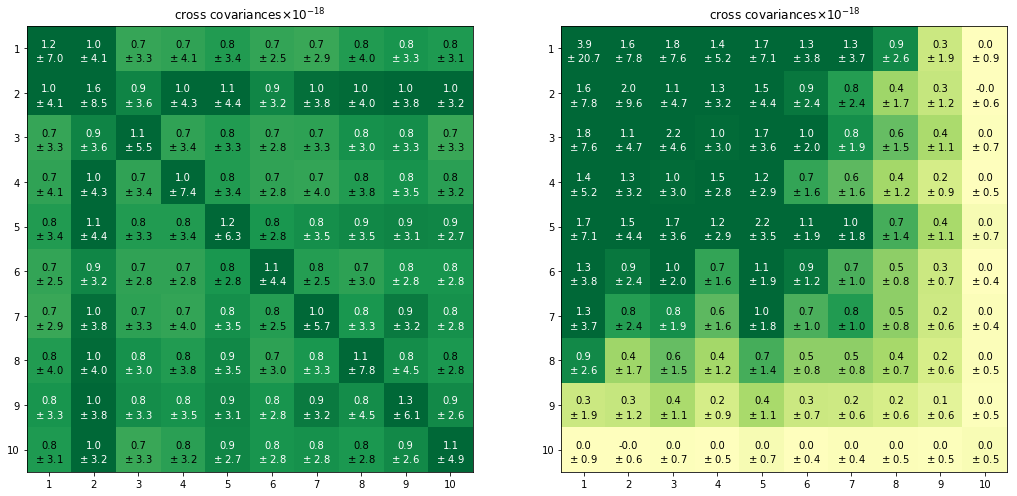

sum:0.013350693704330265
trace:0.019130662746514766
sum:0.018568979565213067
trace:0.02462041993103447


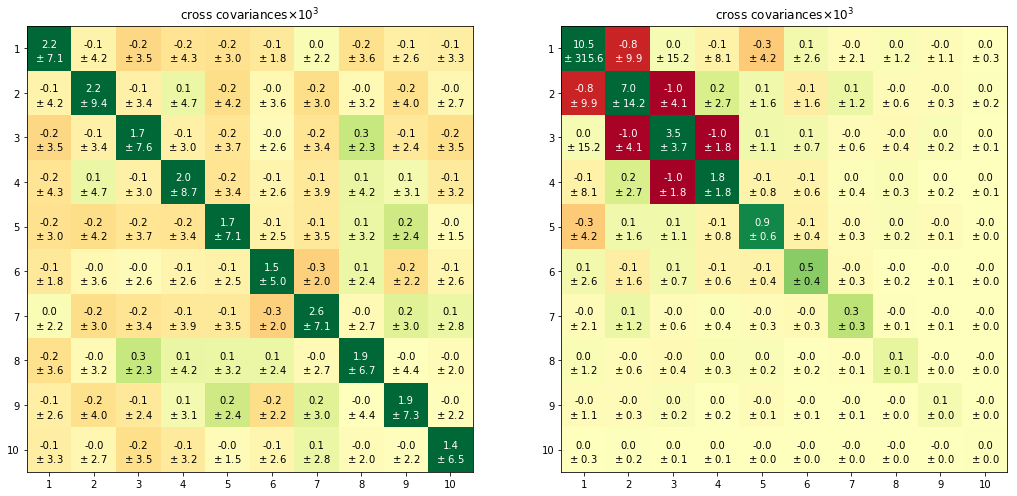

In [32]:

for scale in ['lin', 'log']:

#     if scale == 'log':
#         rand = parts_cross_cov_random_log.groupby(['s', 'partA', 'partB']).agg(['mean', 'median', 'std'])
#         sort = parts_cross_cov_sorted_log.groupby(['s', 'partA', 'partB']).agg(['mean', 'median', 'std'])
#     else:
#         rand = parts_cross_cov_random_lin.groupby(['s', 'partA', 'partB']).agg(['mean', 'median', 'std'])
#         sort = parts_cross_cov_sorted_lin.groupby(['s', 'partA', 'partB']).agg(['mean', 'median', 'std'])

        
    if scale == 'log':
        rand = parts_cross_cov_random_log.loc[
            (parts_cross_cov_random_log.compA == 'noise') & (parts_cross_cov_random_log.compB == 'noise')
        ].groupby(['s', 'partA', 'partB']).agg(['mean', 'median', 'std'])
        
        sort = parts_cross_cov_sorted_log.loc[
                        (parts_cross_cov_sorted_log.compA == 'noise') & (parts_cross_cov_sorted_log.compB == 'noise')
        ].groupby(['s', 'partA', 'partB']).agg(['mean', 'median', 'std'])
    else:
        rand = parts_cross_cov_random_lin.groupby(['s', 'partA', 'partB']).agg(['mean', 'median', 'std'])
        sort = parts_cross_cov_sorted_lin.groupby(['s', 'partA', 'partB']).agg(['mean', 'median', 'std'])

    

    fig, axs = plt.subplots(1, 2, figsize = (15, 7))

    for i, df in enumerate([rand, sort]):
        ax = axs[i]
        mat_data = np.flip(df.loc[0.5]['cov']['median'].unstack().values); 
        print('sum:'+str(mat_data.sum())); print('trace:'+str(np.diagonal(mat_data).sum()));
        
        std_data = np.flip(df.loc[0.5]['cov']['std'].unstack().values)
        avg_magnitude = np.log10(abs(mat_data).mean()).round(); #c = int(-avg_magnitude)

        if scale == 'log': 
            c = 3
        else:
            c = -18
        
        mat_data_sc = mat_data*10**(c)
        std_data_sc = std_data*10**(c)

#         display(mat_data_sc)
        im = ax.imshow(mat_data_sc, vmin = -1, vmax = 1, cmap = 'RdYlGn')

        # Show all ticks...
        ax.set_xticks(range(Q))
        ax.set_yticks(range(Q))
        # ... and label them with the respective list entries
        ax.set_xticklabels(range(1, Q + 1))
        ax.set_yticklabels(range(1, Q + 1))

        # Anotate mean values
        for i in range(Q):
            for j in range(Q):
                if abs(mat_data_sc[i, j]) > .8:
                    text = ax.text(j, i-.1, round(mat_data_sc[i, j], 1),
                                   ha="center", va="center", color="w")
                else: 
                    text = ax.text(j, i-.1, round(mat_data_sc[i, j], 1),
                                   ha="center", va="center", color="k")

        # Anotate stds
        for i in range(Q):
            for j in range(Q):
                if abs(mat_data_sc[i, j]) > .8:
                    text = ax.text(j, i+.2, r'$\pm\ $'+str(round(std_data_sc[i, j], 1)),
                                   ha="center", va="center", color="w")
                else: 
                    text = ax.text(j, i+.2, r'$\pm\ $'+str(round(std_data_sc[i, j], 1)),
                                   ha="center", va="center", color="k")

        ax.set_title("cross covariances" + r'$\times 10^{{{}}}$'.format(c))
    fig.tight_layout()

    plt.savefig('./../../../WRITING/paper1_writing/figures/parts_crosscov_'+scale+'.png')
    plt.show()

In [23]:
xx

NameError: name 'xx' is not defined

In [21]:
bs_result = pd.concat(out_list)
# data = bs_result.groupby(['q', 's']).agg(['mean', 'std']).drop('m', axis = 1)
data = bs_result.groupby(['q', 's']).median().drop('m', axis = 1)

NameError: name 'out_list' is not defined

NameError: name 'data' is not defined

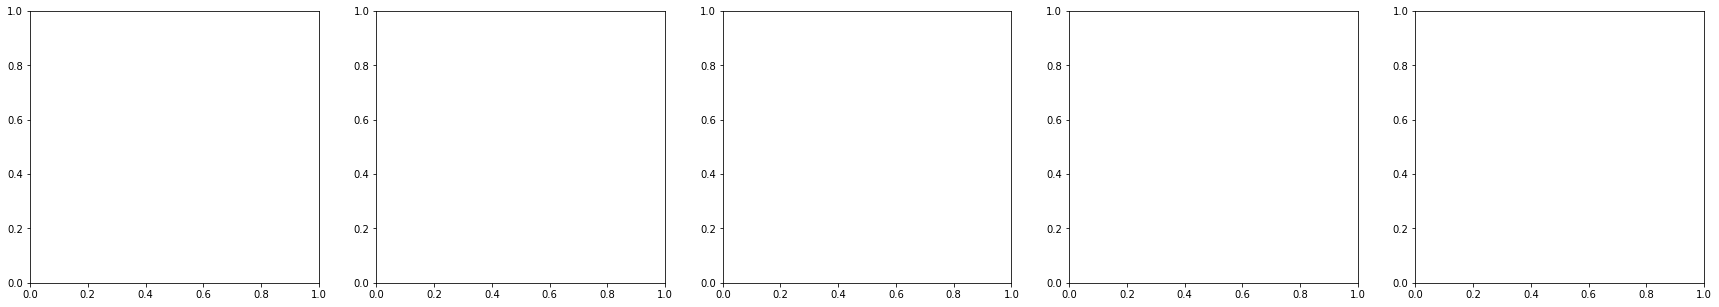

In [22]:
fig, axs = plt.subplots(1, 5, figsize = (30, 5))


for i, s in enumerate([.02, .05, .1, .25, .5]):
    ax = axs[i]
    data_s = data.loc[data.index.get_level_values('s') == s]
    lognqs = np.log10(data_s.nqs).values

    ax.plot(lognqs, np.log10(np.sqrt(data_s['yqs_var'].values)), marker = 'o', label = 'total') # actual std of quantiles
    ax.plot(lognqs, np.log10(np.sqrt(data_s['noise_var'].values)), marker = 'o', label = 'n') # std of statistical noise
    ax.plot(lognqs, np.log10(np.sqrt(data_s['base_var'].values)), marker = 'o', label = 'bias') # std of bias
    ax.plot(lognqs, np.log10(np.sqrt(data_s['common_R_var'].values)), label = 'common') # std of the common trend
    ax.plot(lognqs, np.log10(np.sqrt(data_s['common_R_var'].values) /5), label = 'common', lw = .5, c = '.5') # std of the common trend
    ax.plot(lognqs, np.log10(np.sqrt(data_s['common_R_var'].values + data_s['base_var'].values + data_s['noise_var'].values)), linestyle = '--', c = '.5', label = 'diag exp') # std of the common trend
    ax.plot(lognqs, .5*i + 8.3-lognqs/2, label = '1/sqrt(n)', lw = .5, c = '.5')
    ax.legend(loc = (1, .5))
    ax.set_ylim(7, 10)
plt.show()

In [ ]:
## Same thing but I want no biases. So, I want an effective nq and use a lognormal > 3 CDF levels, over T = 17 as base on which to add shocks. Also, now the shocks will be randomised (within quantile?)

## Zero BIAS

### Load data

In [ ]:
df = pd.read_csv('./../../data/processed/ID_Y.csv')
# df = pd.read_csv('./../../data/processed/.csv')

sales = df.loc[df.IMPORT == 0].groupby(['ID', 'YEAR'])['VART'].sum().unstack()
sales = sales.loc[sales.sum(1).sort_values().index]

logsales = np.log10(sales)
demlogsales = logsales.subtract(logsales.mean(1), axis = 0)

sizes = sales.loc[sales.sum(1).sort_values().index].sum(1)

Q = 10
parts = pd.cut(sizes.cumsum()/sizes.sum(), Q, labels = range(Q)).sort_index()

In [ ]:
## Effective Nq
eff_nq = sales.groupby(parts).count().mean(1).round().astype(int)
eff_nq

### Size dist Params

In [ ]:
from scipy.stats import norm
# from scipy.stats import norm
# from scipy.stats import pareto
from scipy.special import erf

#  - Lognormal clipped x > 3. 
sigma = 1.2810683494198207 # 1.3149476902828778
mu = 4.536908110675739 # 4.470439741406725
# 11.5% of guys that would be below the .3 threshold.
z = (mu - 3)/sigma
cum_th = 1 - .5*(1 + erf(z/np.sqrt(2)))

# emp_nq_med = nq.groupby(level = 0).median()
N = int(eff_nq.sum().round())

N_ = int(round(N/(1 - cum_th))) # We use a larger N ..
# From the theoretical N and the ppf we can know the theoretical quantiles
x_logn_clip3 = np.array([norm.ppf(q, mu, sigma) for q in np.arange(0, 1, 1/N_) + .5/N_])
x_logn_clip3 = x_logn_clip3[(-N - 1):-1]


T = 17

In [ ]:
s0 = pd.Series(np.power(10, x_logn_clip3))

s0_n = s0.groupby(pd.cut(s0.cumsum()/s0.sum(), Q, labels = range(Q))).count()
bs_n = eff_nq.round(1)

show = pd.concat([bs_n, s0_n], axis = 1); show.columns = ['Bootstrap nq', 'Lognormal >3 synthetic dist']
show

In [ ]:
# simu_shocks = (s/micro_s)*logsales.sub(logsales.mean(1), axis = 0)

### Decomposition into Common shocks and noise

In [ ]:

dem = logsales.sub(logsales.mean(1), axis = 0)
sample_shocks = dem.loc[dem.count(1) > 1].unstack().dropna() # (1.6 m real shocks)
micro_s = logsales.sub(logsales.mean(1), axis=0).unstack().std()
zero_shock = pd.DataFrame(pd.concat(T * [pd.Series(x_logn_clip3)], axis = 1))
zero_shock.columns = sales.columns

out_list = []

n = 50
Q = 10

for m in range(n):
    print(m)
    for s in [.02, .05, .1, .25, .5]:

#         df_bs = sales.sample(frac = .5)
#         df_bs = df_bs.loc[df_bs.sum(1).sort_values().index] #sorting

#         logsales = np.log10(sales)
        simu_shocks = pd.DataFrame((s/micro_s)*np.random.choice(sample_shocks.values, zero_shock.shape))
        simu_shocks.columns = sales.columns

#         micro_s = logsales.sub(logsales.mean(1), axis=0).unstack().std()
#         zero_shock = logsales.notna().multiply(logsales.mean(1), axis = 0).replace(0, np.nan)
        
#         simu_shocks = (s/micro_s)*logsales.sub(logsales.mean(1), axis = 0)

        total = np.power(10, zero_shock + simu_shocks)
        base = np.power(10, zero_shock)
        noise = np.power(10, zero_shock + simu_shocks) - np.power(10, zero_shock)
        
        total['q'] = pd.cut(total.sum(1).cumsum(), Q, labels = range(Q))

        common_R = noise.groupby(total['q']).sum().median()
        # optional, broadcast to 2d Q x T
        common_R = pd.DataFrame(np.outer(np.ones(Q), common_R.values), columns=common_R.index)

        noise_qs = noise.groupby(total['q']).sum() - common_R
        base_qs = base.groupby(total['q']).sum()
        yqs = common_R + noise_qs + base_qs
        
        nqs = total['q'].value_counts().values
#         lognqs = np.log10(nqs)
        
        out = pd.concat([yqs.var(1), noise_qs.var(1), base_qs.var(1), common_R.var(1)], axis = 1)
        out.columns = ['yqs_var', 'noise_var', 'base_var', 'common_R_var']
        out['q'] = range(Q); out['m'] = m; out['nqs'] = nqs; out['s'] = s;

        out_list += [out]

In [ ]:
bs_result = pd.concat(out_list)
# data = bs_result.groupby(['q', 's']).agg(['mean', 'std']).drop('m', axis = 1)
data = bs_result.groupby(['q', 's']).median().drop('m', axis = 1)

In [ ]:
fig, axs = plt.subplots(1, 5, figsize = (30, 5))


for i, s in enumerate([.02, .05, .1, .25, .5]):
    ax = axs[i]
    data_s = data.loc[data.index.get_level_values('s') == s]
    lognqs = np.log10(data_s.nqs).values

    ax.plot(lognqs, np.log10(np.sqrt(data_s['yqs_var'].values)), marker = 'o', label = 'total') # actual std of quantiles
    ax.plot(lognqs, np.log10(np.sqrt(data_s['noise_var'].values)), marker = 'o', label = 'n') # std of statistical noise
#     ax.plot(lognqs, np.log10(np.sqrt(data_s['base_var'].values)), marker = 'o', label = 'bias') # std of bias
    ax.plot(lognqs, np.log10(np.sqrt(data_s['common_R_var'].values)), label = 'common') # std of the common trend
    ax.plot(lognqs, np.log10(np.sqrt(data_s['common_R_var'].values) /5), label = 'common', lw = .5, c = '.5') # std of the common trend
    ax.plot(lognqs, np.log10(np.sqrt(data_s['common_R_var'].values + data_s['base_var'].values + data_s['noise_var'].values)), linestyle = '--', c = '.5', label = 'diag exp') # std of the common trend
    ax.plot(lognqs, .5*i + 8.3-lognqs/2, label = '1/sqrt(n)', lw = .5, c = '.5')
    ax.legend(loc = (1, .5))
    ax.set_ylim(7, 11)
plt.tight_layout()
plt.show()

### Decomposition into only noise

In [ ]:

dem = logsales.sub(logsales.mean(1), axis = 0)
sample_shocks = dem.loc[dem.count(1) > 1].unstack().dropna() # (1.6 m real shocks)
micro_s = logsales.sub(logsales.mean(1), axis=0).unstack().std()
zero_shock = pd.DataFrame(pd.concat(T * [pd.Series(x_logn_clip3)], axis = 1))
zero_shock.columns = sales.columns

out_list = []

n = 50
Q = 10

for m in range(n):
    print(m)
    for s in [.02, .05, .1, .25, .5]:

#         df_bs = sales.sample(frac = .5)
#         df_bs = df_bs.loc[df_bs.sum(1).sort_values().index] #sorting

#         logsales = np.log10(sales)
        simu_shocks = pd.DataFrame((s/micro_s)*np.random.choice(sample_shocks.values, zero_shock.shape))
        simu_shocks.columns = sales.columns

        total = np.power(10, zero_shock + simu_shocks)
        base = np.power(10, zero_shock) # Is really frozen in this case
        noise = np.power(10, zero_shock + simu_shocks) - np.power(10, zero_shock)
        
        total['q'] = pd.cut(total.sum(1).cumsum(), Q, labels = range(Q))

        noise_qs = noise.groupby(total['q']).sum()
        base_qs = base.groupby(total['q']).sum()
        yqs = noise_qs + base_qs
        
        nqs = total['q'].value_counts().values
#         lognqs = np.log10(nqs)
        
        out = pd.concat([yqs.var(1), noise_qs.var(1), base_qs.var(1)], axis = 1)
        out.columns = ['yqs_var', 'noise_var', 'base_var']
        out['q'] = range(Q); out['m'] = m; out['nqs'] = nqs; out['s'] = s;

        out_list += [out]

In [ ]:
bs_result = pd.concat(out_list).reset_index(drop = True)
# data = bs_result.groupby(['q', 's']).agg(['mean', 'std']).drop('m', axis = 1)
data = bs_result.groupby(['q', 's']).median().drop('m', axis = 1)

In [ ]:
## Fit the 1/n

fit_data = np.log10(data[['nqs', 'yqs_var']])

for s in fit_data.index.get_level_values('s').unique():
    fit_data_s = fit_data.loc[fit_data.index.get_level_values('s') == s]
    fit_data_s = fit_data_s.loc[fit_data_s.nqs < 4]

    x = fit_data_s.nqs
    y = fit_data_s.yqs_var
    z = np.polyfit(x, y, 1); p = np.poly1d(z);
    
    print(s, p/2)

In [ ]:
fig, axs = plt.subplots(1, 5, figsize = (30, 5))


for i, s in enumerate([.02, .05, .1, .25, .5]):
    ax = axs[i]
    data_s = data.loc[data.index.get_level_values('s') == s]
    lognqs = np.log10(data_s.nqs).values

    ax.plot(lognqs, np.log10(np.sqrt(data_s['yqs_var'].values)), marker = 'o', label = 'total') # actual std of quantiles
    ax.plot(lognqs, np.log10(np.sqrt(data_s['noise_var'].values)), marker = 'o', label = 'n') # std of statistical noise

    ax.plot(lognqs, .5*i + 8.3-lognqs/2, label = '1/sqrt(n)', lw = .5, c = '.5')
    ax.legend(loc = (1, .5))
    ax.set_ylim(7, 11)
plt.tight_layout()
plt.show()

In [ ]:
xx

In [ ]:
total =  quantile bases: [ np.power(10, zero_shock) ]  +  quantile noises: [ np.power(10, zero_shock + simu_shocks) - np.power(10, zero_shock) ] = line + shocks + quantiles

In [ ]:
# total = np.power(10, zero_shock + simu_shocks)
# base = np.power(10, zero_shock)
# noise = np.power(10, zero_shock + simu_shocks) - np.power(10, zero_shock)

# total_q = total.groupby(df_bs['q']).sum()
# base_q = base.groupby(df_bs['q']).sum()
# noise_q = noise.groupby(df_bs['q']).sum()

# q = 5
# print(total_q.iloc[q].var())
# print(pd.concat([noise_q.iloc[q], base_q.iloc[q]], axis = 1).cov().sum().sum())

# for q in range(Q):
#     print(q)
#     (( np.power(10, zero_shock + simu_shocks)).groupby(total['q']).sum()).iloc[q].plot()#.T.plot(legend = False)

#     (np.power(10, zero_shock).groupby(total['q']).sum()).iloc[q].plot()#.T.plot(legend = False)

#     ((np.power(10, zero_shock + simu_shocks) - np.power(10, zero_shock)).groupby(total['q']).sum()).iloc[q].plot(linestyle = '--')#.T.plot(legend = False)
#     plt.ylim(0, 2.5e10)

#     plt.show()

In [ ]:
## Non scaled, sanity check.

In [ ]:
# out_list = []
qs_bs_list = []
parts_bs_list = []
# nq_list = []
# trend_std_list = []

n = 50
Q = 10

for m in range(n):

    df_bs = sales.sample(frac = .5)
    df_bs = df_bs.loc[df_bs.sum(1).sort_values().index] #sorting

    df_bs['q'] = pd.cut(df_bs.sum(1).cumsum(), Q, labels = range(Q))

    nq = df_bs.groupby('q').count().mean(1) ## Effective nq
#     nq = df_bs.q.value_counts()  ## Total count n

    df_bs = df_bs.groupby('q').sum()

    common_trend = df_bs.median()

    x = np.log10(common_trend).index.astype(int).values
    y = np.log10(common_trend).values
    z = np.polyfit(x, y, 1); p = np.poly1d(z);

    exp_curve = pd.Series(np.power(10, p(x)), index = x)

#         df_bs = df_bs/(.5 * exp_curve)
    shocks = common_trend/exp_curve
    df_bs = df_bs/(shocks*exp_curve) # == df_bs/common_trend

    parts_bs_2 = pd.concat([exp_curve, shocks, df_bs.sum()], axis = 1).T
    parts_bs_2['m'] = m; parts_bs_2['s'] = s
    parts_bs_list += [parts_bs_2]


    df_bs['nq'] = nq; df_bs['m'] = m; df_bs['s'] = s;
    qs_bs_list += [df_bs]

#         trend_std_list += [np.log10(common_trend/np.power(10, p(x))).std()]


parts_bs_2 = pd.concat(parts_bs_list)
qs_bs_2 = pd.concat(qs_bs_list)

In [ ]:

## Microshocks

demlogsales['parts'] = parts
std_data = demlogsales.loc[demlogsales.iloc[:, :-1].count(1) > 1]
std_data.reset_index().set_index(['ID', 'parts']).stack().groupby(level = 'parts').std()


# Un array de donde samplear shocks empiricos.
emp_shocks = std_data.reset_index().set_index(['ID', 'parts']).stack().values
len(emp_shocks)

In [ ]:
# # BS for sorted quantile partitions
# n = 50
# out = []

# for m in range(n):
#     df_bs = sales.sample(frac = .5)
#     df_bs = df_bs.loc[df_bs.sum(1).sort_values().index] #sorting
#     df_bs['q'] = pd.cut(df_bs.sum(1).cumsum(), Q, labels = range(Q))

# #     nq = df_bs.groupby('q').count().mean(1) ## Effective nq
# #     nq = df_bs.q.value_counts()  ## Total count n

#     df_bs = df_bs.groupby('q').sum()
#     out += [df_bs]
    
# bs_data = pd.concat(out)

# demedianed_log10 = np.log10(bs_data/pd.concat(n*[bs_data.groupby(level = 0).median()]))
# # var_nq = pd.concat([demedianed_log10.var(1), nq], axis = 1); var_nq.columns = ['var', 'nq']
# # quantile shocks

# qshocks = demedianed_log10.diff(axis = 1).stack().reset_index()
# # qshocks['bin'] = pd.cut(qshocks[0], np.arange(-.1, .1, .001))
# qshocks['bin'] = pd.cut(qshocks[0], np.arange(-.1, .1, .001))

# qshocks_hist = pd.DataFrame(qshocks.groupby(['bin', 'q']).size().unstack())

# qshocks_hist.rolling(6, center = True).mean().plot(figsize = (7, 5), marker = '.')
# plt.yscale('log')
# plt.show()


In [ ]:
# BS for sorted quantile partitions
n = 50
out = []

for m in range(n):
    df_bs = sales.sample(frac = .5)
    df_bs = df_bs.loc[df_bs.sum(1).sort_values().index] #sorting
    df_bs['q'] = pd.cut(df_bs.sum(1).cumsum(), Q, labels = range(Q))

#     nq = df_bs.groupby('q').count().mean(1) ## Effective nq
#     nq = df_bs.q.value_counts()  ## Total count n

    df_bs = df_bs.groupby('q').sum()
    out += [df_bs]
    
bs_data = pd.concat(out)

demedianed_log10 = np.log10(bs_data/pd.concat(n*[bs_data.groupby(level = 0).median()]))
qshocks = demedianed_log10.diff(axis = 1).stack().reset_index()
qshocks['bin'] = pd.cut(qshocks[0], np.arange(-.1, .1, .001))


# BS for sorted quantile partitions
n = 50
out = []

for m in range(n):
    df_bs = sales.sample(frac = .5)
#     df_bs = df_bs.loc[df_bs.sum(1).sort_values().index] #sorting
    df_bs['q'] = pd.cut(df_bs.sum(1).cumsum(), Q, labels = range(Q))
    df_bs = df_bs.groupby('q').sum()
    out += [df_bs]
    
bs_data_unsort_q = pd.concat(out)

demedianed_log10 = np.log10(bs_data_unsort_q/pd.concat(n*[bs_data_unsort_q.groupby(level = 0).median()]))
qshocks2 = demedianed_log10.diff(axis = 1).stack().reset_index()
qshocks2['bin'] = pd.cut(qshocks2[0], np.arange(-.1, .1, .001))



## BS for Aggregate

n = 20

lo_agg = []
hi_agg = []
for m in range(n):
    df_bs = sales.sample(frac = .5)
    df_bs.sum()
    
    agg = np.log10(df_bs.sum()/df_bs.sum().mean())
    
    lo_agg += [agg.quantile(.1)]
    hi_agg += [agg.quantile(.9)]
    
lo_agg = np.array(lo_agg).mean()
hi_agg = np.array(hi_agg).mean()

## Firm sales xlims come from other notebook

## Log Approximation

In [ ]:
import matplotlib.patches as patches
fig, axs = plt.subplots(1, 4, figsize = (28, 5))


## Aggregate
ax = axs[0]
x = np.arange(lo_agg, hi_agg, 0.001)
y = np.power(10, x)
ax.plot(x, y, label = 'agg', lw = 2, alpha = .5, color = 'k')
ax.plot(x, np.log(10) * (x) + 1, c = 'r', linestyle = '--', lw = .25)
ax.plot(x, (np.log(10) * (x))**2/2 + np.log(10) * (x) + 1, c = 'r')
ax.set_xlim(-.12, .1)
ax.set_ylim(.7, 1.25)
ax.legend()

### Sorted quantile partition

lo_q = qshocks.groupby('q')[0].quantile(.1)
hi_q = qshocks.groupby('q')[0].quantile(.9)

ax = axs[1]
for q in range(Q):
    x = np.arange(lo_q[q], hi_q[q], 0.001)
    y = np.power(10, x)
    ax.plot(x, y, label = q, lw = 10 - q, alpha = .5, color = 'k')
    ax.plot(x, np.log(10) * (x) + 1, c = 'r', linestyle = '--', lw = .25)
    ax.plot(x, (np.log(10) * x)**2/2 + np.log(10) * x + 1, c = 'r')
ax.set_xlim(-.12, .1)
ax.set_ylim(.7, 1.25)
ax.legend()


### Unsorted quantile partition

lo_q = qshocks2.groupby('q')[0].quantile(.1)
hi_q = qshocks2.groupby('q')[0].quantile(.9)

ax = axs[2]
for q in range(Q):
    x = np.arange(lo_q[q], hi_q[q], 0.001)
    y = np.power(10, x)
    ax.plot(x, y, label = q, lw = 10 - q, alpha = .5, color = 'k')
    ax.plot(x, np.log(10) * (x) + 1, c = 'r', linestyle = '--', lw = .25)
    ax.plot(x, (np.log(10) * x)**2/2 + np.log(10) * x + 1, c = 'r')
ax.set_xlim(-.12, .1)
ax.set_ylim(.7, 1.25)
ax.legend()

### Firm level
ax = axs[3]
# half_nominal_measure_l = df_demlog_nominal_shrink.loc[df_demlog_nominal_shrink['gap'].cumsum()/df_demlog_nominal_shrink['gap'].sum() < .25].demlog.max()
# half_nominal_measure_r = df_demlog_nominal_growth.loc[df_demlog_nominal_growth['gap'].cumsum()/df_demlog_nominal_growth['gap'].sum() < .75].demlog.max()

x90 = np.arange(-1.7, 0.7, .1)
x75 = np.arange(-.73, 0.32, .05)  # Only 25% of the value in added in shocks smaller than this, 25% of the value in added in shocks larger than this

ax.plot(x90, np.power(10, x90), lw = 2, alpha = .5, color = 'k')
ax.plot(x75, np.power(10, x75), lw = 5, alpha = .5, color = 'k')

ax.plot(x90, 1 + np.log(10)*x90 + (np.log(10)*x90)**2/2 + (np.log(10)*x90)**3/6, linestyle = '--', alpha = .5, c = 'r', lw =1, label = 'deg 3 poly')
ax.plot(x90, 1 + np.log(10)*x90 + (np.log(10)*x90)**2/2, linestyle = ':', alpha = .5, c = 'r', lw =1, label = 'deg 2 poly')
ax.plot(x90, 1 + np.log(10)*x90, linestyle = ':', alpha = .5, c = 'r', label = 'line')

# Create a Rectangle patch
rect = patches.Rectangle((-.12, .7), .1- (-.12), 1.25 - .7,linewidth=1,edgecolor='k',facecolor='none')
ax.add_patch(rect)

ax.legend()
ax.set_ylim(0, 4.5)

plt.show()

In [ ]:

# data = qshocks_hist.rolling(6, center = True).mean()
# data = data.loc[[-.05 < m.mid < .05 for m in data.index]]

# quad_params = []

# for q in range(Q):
#     x = [m.mid for m in data[q].dropna().index]
#     y = data[q].dropna().values
#     z = np.polyfit(x, y, 2)
#     p = np.poly1d(z)
# #     print(p)
#     quad_params += [z]
    
# quad_params = np.array(quad_params)


# # NQs from bootstrap
# var_nq['m'] = [i//Q for i in range(n*Q)]
# nq = var_nq.reset_index().set_index(['q', 'm'])['nq'].unstack().median(1)


# fig, axs = plt.subplots(1, 2, figsize = (16, 5))

# ax = axs[0]
# ax.plot(range(Q), -quad_params[:, 1]/(2*quad_params[:, 0]), label = 'mu_q')
# ax.plot(range(Q), 1/np.sqrt(-2*quad_params[:, 0]), marker = '.', label = 'sigma_q')
# ax.set_xlabel('q'); ax.set_ylabel('log pts')
# ax.axhline(0, c = '.5', linestyle = '--')
# ax.legend()


# ax = axs[1]
# ax.plot(np.log10(nq.values), -quad_params[:, 1]/(2*quad_params[:, 0]), label = 'mu_q')
# ax.plot(np.log10(nq.values), 1/np.sqrt(-2*quad_params[:, 0]), marker = '.', label = 'sigma_q')
# ax.set_xlabel('log_n'); ax.set_ylabel('log pts')
# ax.axhline(0, c = '.5', linestyle = '--')
# ax.legend()

# plt.show()

## Fit to theoretical deduction with "narrow bin" approximation

In [ ]:

## Microshocks

demlogsales['parts'] = parts
std_data = demlogsales.loc[demlogsales.iloc[:, :-1].count(1) > 1]
std_data.reset_index().set_index(['ID', 'parts']).stack().groupby(level = 'parts').std()


# Un array de donde samplear shocks empiricos.
emp_shocks = std_data.reset_index().set_index(['ID', 'parts']).stack().values
len(emp_shocks)

In [ ]:
def percentile_lo (x): 
    return np.percentile(x, q=10)
def percentile_hi (x): 
    return np.percentile(x, q=90)

In [ ]:
nqs

In [ ]:
# emp_nqs = np.round(nq.sort_values()).astype(int)
partition = eff_nq.astype(int)
ss = np.arange(0.1, .8, .1)
M = 25

T = 17

In [ ]:

### Experiments (gaussian and laplace deviations from mean)

results = []

s0 = emp_shocks.std()

for dist in ['norm', 'lapl', 'emp']:
    for q in range(Q)[1:]:
        part = partition.index[q]
        n = partition.values[q]
#         x0 = np.log10(sizes.loc[parts == part]).values # comment for narrow bin limit
        print(q, n)
        for s in ss:
            for m in range(M):
                if dist == 'norm':
                    shocks = np.random.normal(0, s, (n, T))
                elif dist == 'lapl':
                    shocks = np.random.laplace(0, s, (n, T))/np.sqrt(2)
                elif dist == 'emp':
                    shocks = (np.random.choice(emp_shocks, n * T)*(s/s0)).reshape(n, T)
                    
                values = np.log10(np.power(10, shocks).sum(0)/n) #M?
#                 values = np.log10(np.power(10, x0[:, None] + shocks).sum(0)/np.power(10, x0[:, None]).sum(0)) #M? # comment for narrow bin limit

#             t += [np.power(10, x0 + x1).sum()/(n*10**mu0)]
                results += [[dist, s, n, m, values.mean(), values.std()]]

result = pd.DataFrame(results, columns = ['dist', 's', 'nq', 'repeat', 'mean', 'std'])


### vs micro sigma

In [ ]:

fig, axs = plt.subplots(2, 3, figsize = (15, 8))

#################
# Normal
plot_data = result.loc[result.dist == 'norm'].groupby(['nq','s'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()

ax = axs[0][0]
ax.set_title('mean, normal shocks')

y_data = plot_data['mean']['mean'].unstack()
yhi_data = plot_data['mean']['percentile_hi'].unstack() - plot_data['mean']['mean'].unstack()
ylo_data = plot_data['mean']['mean'].unstack() - plot_data['mean']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_ylim(-.1, 1.5)
ax.axhline(0, color = '.5', lw = .5, linestyle = '--')
ax.set_xlabel('micro sigma')
    
## Analytical expectation
ax.plot(x, x**2*np.log(10)/2, color = 'r', linestyle = '--', zorder = 10)

###
ax.set_yscale('log')
ax.set_ylim(.001, 5)

ax.set_xscale('log')


#################
ax = axs[1][0]
ax.set_title('std, normal shocks')

# logplot_data = np.log10(plot_data)
y_data = plot_data['std']['mean'].unstack()
yhi_data = plot_data['std']['percentile_hi'].unstack() - plot_data['std']['mean'].unstack()
ylo_data = plot_data['std']['mean'].unstack() - plot_data['std']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_xlabel('micro sigma')

## Analytical expectation
# for n0 in partition.values[1:]:
#     ax.plot(x, np.sqrt(np.exp(x**2)*(np.exp(x**2) - 1)/n0), color = 'r', linestyle = '--', zorder = 10, lw = .5)
for n0 in partition.values[1:]:
    ax.plot(x, np.sqrt((np.exp(x**2) - 1)/n0), color = 'r', linestyle = '--', zorder = 10, lw = .5)

ax.set_xscale('log')
ax.set_yscale('log')
    
    
#################
# Empirical Shocks
plot_data = result.loc[result.dist == 'emp'].groupby(['nq', 's'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()

ax = axs[0][1]
ax.set_title('mean, Empirical shocks')

y_data = plot_data['mean']['mean'].unstack()
yhi_data = plot_data['mean']['percentile_hi'].unstack() - plot_data['mean']['mean'].unstack()
ylo_data = plot_data['mean']['mean'].unstack() - plot_data['mean']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_ylim(-.1, 1.5)
ax.axhline(0, color = '.5', lw = .5, linestyle = '--')
ax.axvspan(.5, .6, facecolor='.85', alpha=0.5)

ax.set_xlabel('micro sigma')

###
ax.set_yscale('log')
ax.set_ylim(.001, 1.5)
    
ax.set_xscale('log')

#################
    
ax = axs[1][1]
ax.set_title('std, Empirical shocks')

# logplot_data = np.log10(plot_data)
y_data = plot_data['std']['mean'].unstack()
yhi_data = plot_data['std']['percentile_hi'].unstack() - plot_data['std']['mean'].unstack()
ylo_data = plot_data['std']['mean'].unstack() - plot_data['std']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)

ax.axvspan(.5, .6, facecolor='.85', alpha=0.5)

ax.set_xlabel('micro sigma')

ax.set_xscale('log')
ax.set_yscale('log')


#################
# Laplace
plot_data = result.loc[result.dist == 'lapl'].groupby(['nq','s'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()


ax = axs[0][2]
ax.set_title('mean, Laplace shocks')

y_data = plot_data['mean']['mean'].unstack()
yhi_data = plot_data['mean']['percentile_hi'].unstack() - plot_data['mean']['mean'].unstack()
ylo_data = plot_data['mean']['mean'].unstack() - plot_data['mean']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_ylim(-.1, 1.5)
ax.axhline(0, color = '.5', lw = .5, linestyle = '--')
ax.set_xlabel('micro sigma')


## Analytical expectation
ax.plot(x, np.log10(1/(1 - (x*np.log(10))**2/2)), color = 'r', linestyle = '--', zorder = 10)

###
ax.set_yscale('log')
ax.set_ylim(.001, 5)

ax.set_xscale('log')


#################
    
ax = axs[1][2]
ax.set_title('std, Laplace shocks')

# logplot_data = np.log10(plot_data)
y_data = plot_data['std']['mean'].unstack()
yhi_data = plot_data['std']['percentile_hi'].unstack() - plot_data['std']['mean'].unstack()
ylo_data = plot_data['std']['mean'].unstack() - plot_data['std']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
    
ax.set_xlabel('micro sigma')

ax.set_xscale('log')
ax.set_yscale('log')

plt.tight_layout()
plt.savefig('./../../../WRITING/paper1_writing/figures/power_sums_vs_sigma.png')
plt.show()

### vs log(nq)

In [ ]:

fig, axs = plt.subplots(2, 3, figsize = (15, 8))

#################
# Normal
plot_data = result.loc[result.dist == 'norm'].groupby(['s','nq'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()

ax = axs[0][0]
ax.set_title('mean, normal shocks')

y_data = plot_data['mean']['mean'].unstack()
yhi_data = plot_data['mean']['percentile_hi'].unstack() - plot_data['mean']['mean'].unstack()
ylo_data = plot_data['mean']['mean'].unstack() - plot_data['mean']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_ylim(-.1, 1.5)
ax.axhline(0, color = '.5', lw = .5, linestyle = '--')
ax.set_xlabel('log(nq)')
    
ax.set_xscale('log')
#################
ax = axs[1][0]
ax.set_title('std, normal shocks')

# logplot_data = np.log10(plot_data)
y_data = plot_data['std']['mean'].unstack()
yhi_data = plot_data['std']['percentile_hi'].unstack() - plot_data['std']['mean'].unstack()
ylo_data = plot_data['std']['mean'].unstack() - plot_data['std']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_xlabel('log(nq)')

ax.set_xscale('log')
ax.set_yscale('log')

for s0 in [0.1, 0.6]:
    ax.plot(x, np.sqrt((np.exp(s0**2) - 1)/x), color = 'r', linestyle = '--', zorder = 10, lw = .5)

#################
# Empirical Shocks
plot_data = result.loc[result.dist == 'emp'].groupby(['s','nq'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()


ax = axs[0][1]
ax.set_title('mean, Empirical shocks')

y_data = plot_data['mean']['mean'].unstack()
yhi_data = plot_data['mean']['percentile_hi'].unstack() - plot_data['mean']['mean'].unstack()
ylo_data = plot_data['mean']['mean'].unstack() - plot_data['mean']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_ylim(-.1, 1.5)
ax.axhline(0, color = '.5', lw = .5, linestyle = '--')
ax.set_xlabel('log(nq)')

ax.set_xscale('log')
#################
    
ax = axs[1][1]
ax.set_title('std, Empirical shocks')

# logplot_data = np.log10(plot_data)
y_data = plot_data['std']['mean'].unstack()
yhi_data = plot_data['std']['percentile_hi'].unstack() - plot_data['std']['mean'].unstack()
ylo_data = plot_data['std']['mean'].unstack() - plot_data['std']['percentile_lo'].unstack()
x = y_data.columns.values
for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_xlabel('log(nq)')

# sqrt(sobs2 - (strend)2) = (sq)
# ax.plot(np.log10(emp_nq_med), np.log10(np.sqrt(emp_std_mn**2 - np.median(trend_std)**2))) 

ax.set_xscale('log')
ax.set_yscale('log')

for s0 in [0.1, 0.6]:
    ax.plot(x, np.sqrt((np.exp(s0**2) - 1)/x), color = 'r', linestyle = '--', zorder = 10, lw = .5)

#################
# Laplace
plot_data = result.loc[result.dist == 'lapl'].groupby(['s','nq'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()


ax = axs[0][2]
ax.set_title('mean, Laplace shocks')

y_data = plot_data['mean']['mean'].unstack()
yhi_data = plot_data['mean']['percentile_hi'].unstack() - plot_data['mean']['mean'].unstack()
ylo_data = plot_data['mean']['mean'].unstack() - plot_data['mean']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
    
ax.set_ylim(-.1, 1.5)
ax.axhline(0, color = '.5', lw = .5, linestyle = '--')
ax.set_xlabel('log(nq)')
ax.set_xscale('log')

#################
    
ax = axs[1][2]
ax.set_title('std, Laplace shocks')

# logplot_data = np.log10(plot_data)
y_data = plot_data['std']['mean'].unstack()
yhi_data = plot_data['std']['percentile_hi'].unstack() - plot_data['std']['mean'].unstack()
ylo_data = plot_data['std']['mean'].unstack() - plot_data['std']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_xlabel('log(nq)')
ax.set_xscale('log')
ax.set_yscale('log')

for s0 in [0.1, 0.6]:
    ax.plot(x, np.sqrt((np.exp(s0**2) - 1)/x), color = 'r', linestyle = '--', zorder = 10, lw = .5)

plt.tight_layout()
plt.savefig('./../../../WRITING/paper1_writing/figures/power_sums_vs_nq.png')
    
plt.show()

In [ ]:
xx

## Repeat, non narrow bins, i.e. sizes in x0 used

### Bootstrap on empirical data

In [ ]:
# bs_data = qs_bs.loc[qs_bs.s == .1].drop(['nq', 'm', 's'], axis = 1)

# # Empirical stds
# emp_std_lo = np.log10(bs_data).std(1).groupby(level = 0).quantile(.1)
# emp_std_mn = np.log10(bs_data).std(1).groupby(level = 0).mean()
# emp_std_hi = np.log10(bs_data).std(1).groupby(level = 0).quantile(.9)

# # Nqs
# emp_nq_med = nq.groupby(level = 0).median()



In [ ]:
qs_bs_2['std'] = np.log10(qs_bs_2[np.arange(1997, 2014)]).std(1)
grouped_2 = qs_bs_2.reset_index().groupby(['q', 's'])

emp_plot_data_2 = grouped_2['std'].median().unstack()
emp_plot_data_lo_2 = grouped_2['std'].quantile(.25).unstack()
emp_plot_data_hi_2 = grouped_2['std'].quantile(.75).unstack()
nqs = grouped_2['nq'].median().unstack().iloc[:, 0]

In [ ]:
# np.log10(emp_plot_data_hi_2.values.flatten())

In [ ]:
qs_bs['std'] = np.log10(qs_bs[np.arange(1997, 2014)]).std(1)
grouped = qs_bs.reset_index().groupby(['q', 's'])
emp_plot_data = grouped['std'].median().unstack()
emp_plot_data_lo = grouped['std'].quantile(.25).unstack()
emp_plot_data_hi = grouped['std'].quantile(.75).unstack()
nqs = grouped['nq'].median().unstack().iloc[:, 0]

fig, axs = plt.subplots(1, 2, figsize = (18, 6))

#################
    
ax = axs[0]
ax.set_title('std, Empirical shocks')

ax.set_xlabel('log(nq)')

for s in emp_plot_data.columns:
    ax.plot(np.log10(nqs), np.log10(emp_plot_data[s]), marker = '*', label = 'mu_q', color = '.5', lw = 0)
    ax.fill_between(np.log10(nqs), np.log10(emp_plot_data_hi[s]), np.log10(emp_plot_data_lo[s]), color = '.8', alpha = .25, label = 'common_shocks_std')
    
    ax.plot(np.log10(nqs), np.log10(np.sqrt((np.exp(s**2) - 1)/nqs)), color = 'r', linestyle = '--', zorder = 10, lw = .5)
ax.fill_between(np.log10(nqs), np.log10(emp_plot_data_hi_2.values.flatten()), np.log10(emp_plot_data_lo_2.values.flatten()), color = 'g', alpha = .15, label = 'common_shocks_std')

#################
    
ax = axs[1]
ax.set_title('std, Empirical shocks')

emp_plot_data.index = range(Q)

for q in emp_plot_data.index[::3]:
    ax.plot(np.log10(emp_plot_data.columns), np.log10(emp_plot_data.loc[q]), marker = '*', label = 'mu_q', color = '.5', lw = 0)
    ax.fill_between(np.log10(emp_plot_data.columns), np.log10(emp_plot_data_hi.loc[q]), np.log10(emp_plot_data_lo.loc[q]), color = '.8', alpha = .25, label = 'common_shocks_std')

ax.set_xlabel('micro sigma')

plt.show()

### Synthetic lognormal for x0

In [ ]:
from scipy.stats import norm

#  - Lognormal clipped x > 3. 
sigma = 1.2810683494198207 # 1.3149476902828778
mu = 4.536908110675739 # 4.470439741406725
# 11.5% of guys that would be below the .3 threshold.
z = (mu - 3)/sigma
cum_th = 1 - .5*(1 + erf(z/np.sqrt(2)))


N = int(eff_nq.sum().round())

N_ = int(round(N/(1 - cum_th))) # We use a larger N ..
# From the theoretical N and the ppf we can know the theoretical quantiles
x_logn_clip3 = np.array([norm.ppf(q, mu, sigma) for q in np.arange(0, 1, 1/N_) + .5/N_])
x_logn_clip3 = x_logn_clip3[(-N - 1):-1]

In [ ]:
s0 = pd.Series(np.power(10, x_logn_clip3))

s0_n = s0.groupby(pd.cut(s0.cumsum()/s0.sum(), Q, labels = range(Q))).count()
bs_n = eff_nq.round(1)

show = pd.concat([bs_n, s0_n], axis = 1); show.columns = ['Bootstrap nq', 'Lognormal >3 synthetic dist']
show

### Computation of variance

In [ ]:
emp_nqs = np.round(eff_nq.sort_values()).astype(int)
ss = np.arange(0.1, .8, .1)
M = 5

T = 17

In [ ]:
### Experiments (gaussian and laplace deviations from mean)
partition_df = s0_n # index are quantile ixs and value has their n.

results = []

sigma0 = emp_shocks.std()

for dist in ['emp']:
    for q in range(Q):
        part = partition_df.index[q]
        n = partition_df.round().astype(int).values[q]
        x0 = pd.Series(x_logn_clip3).loc[pd.cut(s0.cumsum()/s0.sum(), Q, labels = range(Q)) == part].values
#         print(q, n)
        for s in ss:
            for m in range(M):
                if dist == 'norm':
                    shocks = np.random.normal(0, s, (n, T))
                elif dist == 'lapl':
                    shocks = np.random.laplace(0, s, (n, T))/np.sqrt(2)
                elif dist == 'emp':
                    shocks = (np.random.choice(emp_shocks, n * T)*(s/sigma0)).reshape(n, T)
                    
#                 values = np.log10(np.power(10, shocks).sum(0)/n) #M?
                values = np.log10(np.power(10, x0[:, None] + shocks).sum(0)/np.power(10, x0[:, None]).sum(0)) #M?
                results += [[dist, s, q, n, m, values.mean(), values.std()]]

result = pd.DataFrame(results, columns = ['dist', 's', 'q', 'nq', 'repeat', 'mean', 'std'])


In [ ]:

fig, axs = plt.subplots(2, 2, figsize = (18, 12))

#################
# Empirical Shocks
# plot_data = result.loc[(result.dist == 'emp') & (result.s >= .5)].groupby(['s','nq'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()
plot_data = result.loc[(result.dist == 'emp')].groupby(['s', 'nq'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])

ax = axs[0][0]
ax.set_title('mean, Empirical shocks')

y_data = plot_data['mean']['mean'].unstack()
yhi_data = plot_data['mean']['percentile_hi'].unstack() - plot_data['mean']['mean'].unstack()
ylo_data = plot_data['mean']['mean'].unstack() - plot_data['mean']['percentile_lo'].unstack()
x = np.log10(y_data.columns.values)

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_ylim(-.1, 1.5)
ax.axhline(0, color = '.5', lw = .5, linestyle = '--')
ax.set_xlabel('log(nq)')
    
# # Empirical
# ax.fill_between(np.log10(eff_nq), emp_mean_hi, emp_mean_lo, color = '#1f77b4', alpha = .25, label = 'empirical')
# ax.plot(np.log10(eff_nq), emp_mean_mn, marker = '*', label = 'mu_q', color = 'g', lw = 0)

#################
    
ax = axs[1][0]
ax.set_title('std, Empirical shocks')

logplot_data = np.log10(plot_data)
y_data = logplot_data['std']['mean'].unstack()
yhi_data = logplot_data['std']['percentile_hi'].unstack() - logplot_data['std']['mean'].unstack()
ylo_data = logplot_data['std']['mean'].unstack() - logplot_data['std']['percentile_lo'].unstack()
x = np.log10(y_data.columns.values)

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_xlabel('log(nq)')

# # Empirical
# ax.fill_between(np.log10(eff_nq), np.log10(emp_std_hi), np.log10(emp_std_lo), color = '#1f77b4', alpha = .25, label = 'empirical')
# ax.plot(np.log10(eff_nq), np.log10(emp_std_mn), marker = '*', label = 'mu_q', color = 'g', lw = 0)

# ax.fill_between(np.log10(eff_nq), np.log10(np.quantile(trend_std, .9)), np.log10(np.quantile(trend_std, .1)), color = '.8', alpha = .25, label = 'common_shocks_std')
# ax.axhline(np.mean(trend_std), color = '.5', alpha = .25, lw = .5, label = 'common_shocks_std')

# sqrt(sobs2 - (strend)2) = (sq)
# ax.plot(np.log10(eff_nq), np.log10(np.sqrt(emp_std_mn**2 - np.median(trend_std)**2))) 


#################
# Empirical Shocks
plot_data = result.loc[result.dist == 'emp'].groupby(['nq', 's'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()


ax = axs[0][1]
ax.set_title('mean, Empirical shocks')

y_data = plot_data['mean']['mean'].unstack()
yhi_data = plot_data['mean']['percentile_hi'].unstack() - plot_data['mean']['mean'].unstack()
ylo_data = plot_data['mean']['mean'].unstack() - plot_data['mean']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_ylim(-.1, 1.5)
ax.axhline(0, color = '.5', lw = .5, linestyle = '--')
ax.set_xlabel('micro sigma')

###
ax.set_yscale('log')
ax.set_ylim(.001, 1.5)
    
ax.set_xscale('log')

#################
    
ax = axs[1][1]
ax.set_title('std, Empirical shocks')

logplot_data = np.log10(plot_data)
y_data = logplot_data['std']['mean'].unstack()
yhi_data = logplot_data['std']['percentile_hi'].unstack() - logplot_data['std']['mean'].unstack()
ylo_data = logplot_data['std']['mean'].unstack() - logplot_data['std']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_xlabel('micro sigma')

ax.set_xscale('log')

plt.show()

In [ ]:
xx

In [ ]:

fig, axs = plt.subplots(2, 3, figsize = (27, 12))

#################
# Normal
plot_data = result.loc[result.dist == 'norm'].groupby(['nq','s'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()

ax = axs[0][0]
ax.set_title('mean, normal shocks')

y_data = plot_data['mean']['mean'].unstack()
yhi_data = plot_data['mean']['percentile_hi'].unstack() - plot_data['mean']['mean'].unstack()
ylo_data = plot_data['mean']['mean'].unstack() - plot_data['mean']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_ylim(-.1, 1.5)
ax.axhline(0, color = '.5', lw = .5, linestyle = '--')
ax.set_xlabel('micro sigma')
    
## Analytical expectation
ax.plot(x, x**2*np.log(10)/2, color = 'r', linestyle = '--', zorder = 10)

###
ax.set_yscale('log')
ax.set_ylim(.001, 5)

ax.set_xscale('log')


#################
ax = axs[1][0]
ax.set_title('std, normal shocks')

logplot_data = np.log10(plot_data)
y_data = logplot_data['std']['mean'].unstack()
yhi_data = logplot_data['std']['percentile_hi'].unstack() - logplot_data['std']['mean'].unstack()
ylo_data = logplot_data['std']['mean'].unstack() - logplot_data['std']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_xlabel('micro sigma')

## Analytical expectation
for n0 in emp_nqs:
    ax.plot(x, np.log10(np.sqrt(np.exp(x**2)*(np.exp(x**2) - 1)/n0)), color = 'r', linestyle = '--', zorder = 10, lw = .5)

ax.set_xscale('log')

    
#################
# Laplace
plot_data = result.loc[result.dist == 'lapl'].groupby(['nq','s'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()


ax = axs[0][1]
ax.set_title('mean, Laplace shocks')

y_data = plot_data['mean']['mean'].unstack()
yhi_data = plot_data['mean']['percentile_hi'].unstack() - plot_data['mean']['mean'].unstack()
ylo_data = plot_data['mean']['mean'].unstack() - plot_data['mean']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_ylim(-.1, 1.5)
ax.axhline(0, color = '.5', lw = .5, linestyle = '--')
ax.set_xlabel('micro sigma')


## Analytical expectation
ax.plot(x, np.log10(1/(1 - (x*np.log(10))**2/2)), color = 'r', linestyle = '--', zorder = 10)

###
ax.set_yscale('log')
ax.set_ylim(.001, 5)

ax.set_xscale('log')


#################
    
ax = axs[1][1]
ax.set_title('std, Laplace shocks')

logplot_data = np.log10(plot_data)
y_data = logplot_data['std']['mean'].unstack()
yhi_data = logplot_data['std']['percentile_hi'].unstack() - logplot_data['std']['mean'].unstack()
ylo_data = logplot_data['std']['mean'].unstack() - logplot_data['std']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
    
ax.set_xlabel('micro sigma')

ax.set_xscale('log')


#################
# Empirical Shocks
plot_data = result.loc[result.dist == 'emp'].groupby(['nq', 's'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()


ax = axs[0][2]
ax.set_title('mean, Empirical shocks')

y_data = plot_data['mean']['mean'].unstack()
yhi_data = plot_data['mean']['percentile_hi'].unstack() - plot_data['mean']['mean'].unstack()
ylo_data = plot_data['mean']['mean'].unstack() - plot_data['mean']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_ylim(-.1, 1.5)
ax.axhline(0, color = '.5', lw = .5, linestyle = '--')
ax.set_xlabel('micro sigma')

###
ax.set_yscale('log')
ax.set_ylim(.001, 1.5)
    
ax.set_xscale('log')

#################
    
ax = axs[1][2]
ax.set_title('std, Empirical shocks')

logplot_data = np.log10(plot_data)
y_data = logplot_data['std']['mean'].unstack()
yhi_data = logplot_data['std']['percentile_hi'].unstack() - logplot_data['std']['mean'].unstack()
ylo_data = logplot_data['std']['mean'].unstack() - logplot_data['std']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_xlabel('micro sigma')

ax.set_xscale('log')

plt.show()

In [ ]:
### Proximos testeos: size distribution...

In [ ]:
# Para ellos, es todo igual, nomas que hay una distribucion de sizes, los shocks se agregan a ellas y se divide por (X/Q) en vez de (s0*n)

 ### Size distributions

In [ ]:
from scipy.stats import norm
from scipy.stats import pareto
from scipy.special import erf

# The size dists are:
#  - Lognormal clipped x > 3. 
sigma = 1.2810683494198207 # 1.3149476902828778
mu = 4.536908110675739 # 4.470439741406725
# 11.5% of guys that would be below the .3 threshold.
z = (mu - 3)/sigma
cum_th = 1 - .5*(1 + erf(z/np.sqrt(2)))

# We'll try different N's, until we can match the avg level of France imports 

N = int(1e5)
N_ = int(round(N/(1 - cum_th))) # We use a larger N ..
draw = np.random.normal(mu, sigma, N_) # so that approximately we'll have N guys above x = 3
draw = np.sort(draw)[-N:]

# Now we can have the n(Q, q)
def get_n(x1, Q):
    x_lin = np.power(10, x1)
    bins = pd.cut(pd.Series(np.cumsum(x_lin)), Q)
    ns = bins.value_counts().values
    return bins, ns

# From the theoretical N and the ppf we can know the theoretical quantiles
x_logn_clip3 = np.array([norm.ppf(q, mu, sigma) for q in np.arange(0, 1, 1/N_) + .5/N_])
x_logn_clip3 = x_logn_clip3[(-N - 1):-1]

## N tail for pareto and lognormal tail
N_tail = get_n(x_logn_clip3, 10)[1][1:].sum()

n = N_tail
x_logn_clip3_90 = x_logn_clip3[-N_tail:]

# PARETO
z_0 = -1.1042021 #-1.1771
# value_qs_1 = x_logn_clip3_90.min() # 6.761 in the original fit
value_qs_1 = 6.67465

norm = 1.375
x1 = np.array([pareto.ppf(b = -z_0, scale = 10**value_qs_1, q = q) for q in np.arange(0, 1, 1/(norm*N_tail)) + .5/(norm*N_tail)])
np.log10(pareto.rvs(b = -z_0, size = n, scale = 10**value_qs_1) + 1)
x1 = x1[int(-norm*N_tail - 1):-1]

x_pareto = np.log10(x1)

In [ ]:
# emp_nqs = np.round(nq.sort_values()).astype(int)
ss = np.arange(0.1, .8, .2)
M = 50

T = 17

In [ ]:
### Experiments (gaussian and laplace deviations from mean)

results = []


for dist in ['norm', 'lapl']:
    for j, size_dist in enumerate([x_logn_clip3, x_logn_clip3_90, x_pareto]):
        sdist_name = ['Logn', 'Logn90', 'Pareto'][j]
        bins, partition_ns = get_n(size_dist, Q)
        for q, part in enumerate(bins.unique()):
            x0 = pd.Series(size_dist).loc[bins == part].values
            n = partition_ns[q]
            for s in ss:
                for m in range(M):
                    if dist == 'norm':
                        shocks = np.random.normal(0, s, (n, T))
                    elif dist == 'lapl':
                        shocks = np.random.laplace(0, s, (n, T))/np.sqrt(2)
    #                 values = np.log10(np.power(10, shocks).sum(0)/n) #M?
                    # same as before but now x0 is a vector of sizes in the quantile, determined by the size dist, N and the Q chosen.
                    values = np.log10(np.power(10, x0[:, None] + shocks).sum(0)/np.power(10, x0[:, None]).sum(0)) #M?
    #             t += [np.power(10, x0 + x1).sum()/(n*10**mu0)]


                    results += [[dist, sdist_name, s, n, m, values.mean(), values.std()]]

sdist_result = pd.DataFrame(results, columns = ['dist', 'size_dist', 's', 'nq', 'repeat', 'mean', 'std'])


In [ ]:

fig, axs = plt.subplots(2, 2, figsize = (18, 12))

#################
# Normal
ax = axs[0][0]
ax.set_title('mean, normal shocks')

for sdist in ['Logn', 'Logn90', 'Pareto']:
    plot_data = sdist_result.loc[(sdist_result.size_dist == sdist) & (sdist_result.dist == 'norm')].groupby(['s','nq'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()
    
    y_data = plot_data['mean']['mean'].unstack()
    yhi_data = plot_data['mean']['percentile_hi'].unstack() - plot_data['mean']['mean'].unstack()
    ylo_data = plot_data['mean']['mean'].unstack() - plot_data['mean']['percentile_lo'].unstack()
    x = np.log10(y_data.columns.values)

    for s in y_data.index.values:
        ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
    
ax.set_ylim(-.1, 1.5)
ax.axhline(0, color = '.5', lw = .5, linestyle = '--')
ax.set_xlabel('log(nq)')
    
# #################
ax = axs[1][0]
ax.set_title('std, normal shocks')

for sdist in ['Logn', 'Logn90', 'Pareto']:
    plot_data = sdist_result.loc[(sdist_result.size_dist == sdist) & (sdist_result.dist == 'norm')].groupby(['s','nq'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()
    logplot_data = np.log10(plot_data)
    y_data = logplot_data['std']['mean'].unstack()
    yhi_data = logplot_data['std']['percentile_hi'].unstack() - logplot_data['std']['mean'].unstack()
    ylo_data = logplot_data['std']['mean'].unstack() - logplot_data['std']['percentile_lo'].unstack()
    x = np.log10(y_data.columns.values)

    for s in y_data.index.values:
        ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_xlabel('log(nq)')

# # Empirical
# ax.fill_between(np.log10(emp_nq_med), np.log10(emp_std_hi), np.log10(emp_std_lo), color = '#1f77b4', alpha = .25, label = 'empirical')
# ax.plot(np.log10(emp_nq_med), np.log10(emp_std_mn), marker = '*', label = 'mu_q', color = 'g', lw = 0)

# #################
# # Laplace

ax = axs[0][1]
ax.set_title('mean, Laplace shocks')

for sdist in ['Logn', 'Logn90', 'Pareto']:
    plot_data = sdist_result.loc[(sdist_result.size_dist == sdist) & (sdist_result.dist == 'lapl')].groupby(['s','nq'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()
    
    y_data = plot_data['mean']['mean'].unstack()
    yhi_data = plot_data['mean']['percentile_hi'].unstack() - plot_data['mean']['mean'].unstack()
    ylo_data = plot_data['mean']['mean'].unstack() - plot_data['mean']['percentile_lo'].unstack()
    x = np.log10(y_data.columns.values)

    for s in y_data.index.values:
        ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)

ax.set_ylim(-.1, 1.5)
ax.axhline(0, color = '.5', lw = .5, linestyle = '--')
ax.set_xlabel('log(nq)')
    
# # Empirical
# ax.fill_between(np.log10(emp_nq_med), emp_mean_hi, emp_mean_lo, color = '#1f77b4', alpha = .25, label = 'empirical')
# ax.plot(np.log10(emp_nq_med), emp_mean_mn, marker = '*', label = 'mu_q', color = 'g', lw = 0)

# #################
    
ax = axs[1][1]
ax.set_title('std, Laplace shocks')

for sdist in ['Logn', 'Logn90', 'Pareto']:
    plot_data = sdist_result.loc[(sdist_result.size_dist == sdist) & (sdist_result.dist == 'lapl')].groupby(['s','nq'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()
    logplot_data = np.log10(plot_data)
    y_data = logplot_data['std']['mean'].unstack()
    yhi_data = logplot_data['std']['percentile_hi'].unstack() - logplot_data['std']['mean'].unstack()
    ylo_data = logplot_data['std']['mean'].unstack() - logplot_data['std']['percentile_lo'].unstack()
    x = np.log10(y_data.columns.values)

    for s in y_data.index.values:
        ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_xlabel('log(nq)')

# # Empirical
# ax.fill_between(np.log10(emp_nq_med), np.log10(emp_std_hi), np.log10(emp_std_lo), color = '#1f77b4', alpha = .25, label = 'empirical')
# ax.plot(np.log10(emp_nq_med), np.log10(emp_std_mn), marker = '*', label = 'mu_q', color = 'g', lw = 0)

plt.show()

In [ ]:

fig, axs = plt.subplots(2, 2, figsize = (18, 12))

#################
# Normal
ax = axs[0][0]
ax.set_title('mean, normal shocks')

for sdist in ['Logn', 'Logn90', 'Pareto']:
    plot_data = sdist_result.loc[(sdist_result.size_dist == sdist) & (sdist_result.dist == 'norm')].groupby(['nq', 's'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()
    
    y_data = plot_data['mean']['mean'].unstack()
    yhi_data = plot_data['mean']['percentile_hi'].unstack() - plot_data['mean']['mean'].unstack()
    ylo_data = plot_data['mean']['mean'].unstack() - plot_data['mean']['percentile_lo'].unstack()
    x = np.log10(y_data.columns.values)

    for s in y_data.index.values:
        ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
    
ax.set_ylim(-.1, 1.5)
ax.axhline(0, color = '.5', lw = .5, linestyle = '--')
ax.set_xlabel('micro sigma')
    
# #################
ax = axs[1][0]
ax.set_title('std, normal shocks')

for sdist in ['Logn', 'Logn90', 'Pareto']:
    plot_data = sdist_result.loc[(sdist_result.size_dist == sdist) & (sdist_result.dist == 'norm')].groupby(['nq', 's'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()
    logplot_data = np.log10(plot_data)
    y_data = logplot_data['std']['mean'].unstack()
    yhi_data = logplot_data['std']['percentile_hi'].unstack() - logplot_data['std']['mean'].unstack()
    ylo_data = logplot_data['std']['mean'].unstack() - logplot_data['std']['percentile_lo'].unstack()
    x = np.log10(y_data.columns.values)

    for s in y_data.index.values:
        ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_xlabel('micro sigma')

# # Empirical
# ax.fill_between(np.log10(emp_nq_med), np.log10(emp_std_hi), np.log10(emp_std_lo), color = '#1f77b4', alpha = .25, label = 'empirical')
# ax.plot(np.log10(emp_nq_med), np.log10(emp_std_mn), marker = '*', label = 'mu_q', color = 'g', lw = 0)

# #################
# # Laplace

ax = axs[0][1]
ax.set_title('mean, Laplace shocks')

for sdist in ['Logn', 'Logn90', 'Pareto']:
    plot_data = sdist_result.loc[(sdist_result.size_dist == sdist) & (sdist_result.dist == 'lapl')].groupby(['nq', 's'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()
    
    y_data = plot_data['mean']['mean'].unstack()
    yhi_data = plot_data['mean']['percentile_hi'].unstack() - plot_data['mean']['mean'].unstack()
    ylo_data = plot_data['mean']['mean'].unstack() - plot_data['mean']['percentile_lo'].unstack()
    x = np.log10(y_data.columns.values)

    for s in y_data.index.values:
        ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)

ax.set_ylim(-.1, 1.5)
ax.axhline(0, color = '.5', lw = .5, linestyle = '--')
ax.set_xlabel('micro sigma')
    
# # Empirical
# ax.fill_between(np.log10(emp_nq_med), emp_mean_hi, emp_mean_lo, color = '#1f77b4', alpha = .25, label = 'empirical')
# ax.plot(np.log10(emp_nq_med), emp_mean_mn, marker = '*', label = 'mu_q', color = 'g', lw = 0)

# #################
    
ax = axs[1][1]
ax.set_title('std, Laplace shocks')

for sdist in ['Logn', 'Logn90', 'Pareto']:
    plot_data = sdist_result.loc[(sdist_result.size_dist == sdist) & (sdist_result.dist == 'lapl')].groupby(['nq', 's'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()
    logplot_data = np.log10(plot_data)
    y_data = logplot_data['std']['mean'].unstack()
    yhi_data = logplot_data['std']['percentile_hi'].unstack() - logplot_data['std']['mean'].unstack()
    ylo_data = logplot_data['std']['mean'].unstack() - logplot_data['std']['percentile_lo'].unstack()
    x = np.log10(y_data.columns.values)

    for s in y_data.index.values:
        ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_xlabel('micro sigma')

# # Empirical
# ax.fill_between(np.log10(emp_nq_med), np.log10(emp_std_hi), np.log10(emp_std_lo), color = '#1f77b4', alpha = .25, label = 'empirical')
# ax.plot(np.log10(emp_nq_med), np.log10(emp_std_mn), marker = '*', label = 'mu_q', color = 'g', lw = 0)

plt.show()